# Comparison of Multiple Runs

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
import scipy

## Cutoff times for Training

In [2]:
rets = glob.glob('returns/*bern*.npy')

In [16]:
def get_stats(paths, window_size=150):
    mean = None
    stds = None
    inter_data = []
    x_paths = [os.path.join(os.path.dirname(s), 'x_data-' + os.path.basename(s)) for s in paths]
    max_len = 0
    for xp, p in zip(x_paths, paths):
        xdata = np.load(xp)
        ydata = np.load(p)
        print(xdata[-1])
        target_x = np.arange(200, xdata[-1] + 1)
        smoothy = np.convolve(np.ones(window_size)/window_size, ydata, mode='valid')
        inter = np.interp(target_x, xdata[74:-75], smoothy)
#         xy = np.array([target_x, inter]).swapaxes(0,1)
        inter_data.append(inter)
        if len(inter) > max_len:
            max_len = len(inter)
    divisors = np.zeros((max_len))
    means = np.zeros((max_len))
    stds = np.zeros((max_len))
    for xy in inter_data:
        print(xy.shape)
        divisors[0:xy.shape[0]] = divisors[0:xy.shape[0]] + 1
        means[0:xy.shape[0]] = means[0:xy.shape[0]] + xy
    means = np.divide(means, divisors)
    for xy in inter_data:
        stds[0:xy.shape[0]] = stds[0:xy.shape[0]] + np.power(xy-means[0:xy.shape[0]], 2)
    stds = np.divide(stds, divisors)
    stds = np.sqrt(stds)
    return means[:-10000], stds[:-10000]
    

In [18]:
standards = glob.glob('returns_weight_experiments/weight_positiverev_test*.npy')
means, stds = get_stats(standards)
plt.figure(figsize=(15,10))
plt.plot(means)
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)
# plt.plot(stds)

12193


ValueError: fp and xp are not of the same length.

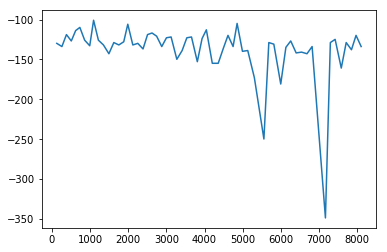

In [23]:
x = np.load('returns_weight_experiments/x_data-weight_positiverev_test_1.npy')
plt.plot(x, np.load('returns_weight_experiments/weight_positiverev_test_1.npy'))

(149263,)
(116460,)


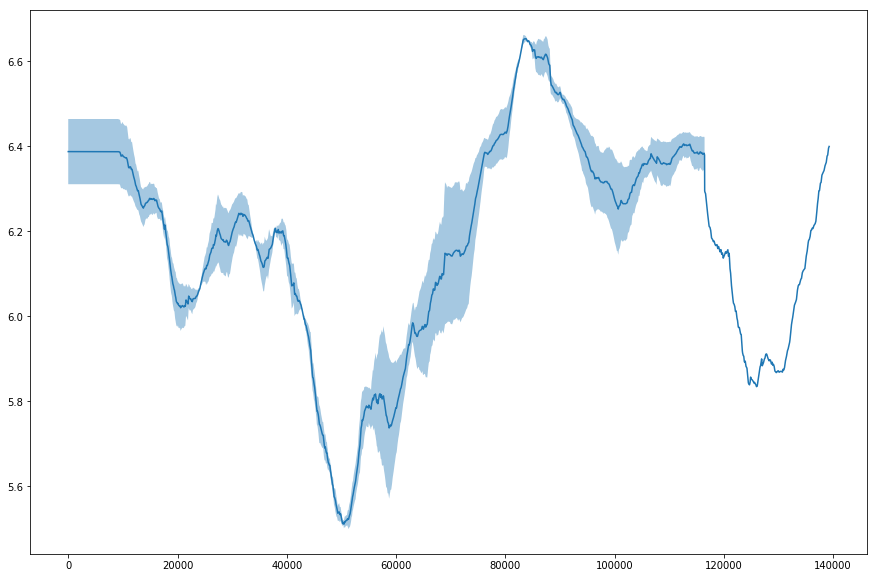

In [13]:
plt.figure(figsize=(15,10))

rps = glob.glob('returns_staging/mirror_mapping_*.npy')
means, stds = get_stats(rps)
plt.plot(means, label='Non-Synergistic')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

(198433,)
(198353,)
(198432,)
(198367,)
(198397,)
(198356,)
(198453,)
(198363,)
(198389,)
(198421,)
(198417,)
(198342,)
(198446,)
(198435,)


Text(0.5, 1.0, 'Comparison of Staged Synergistic Policies')

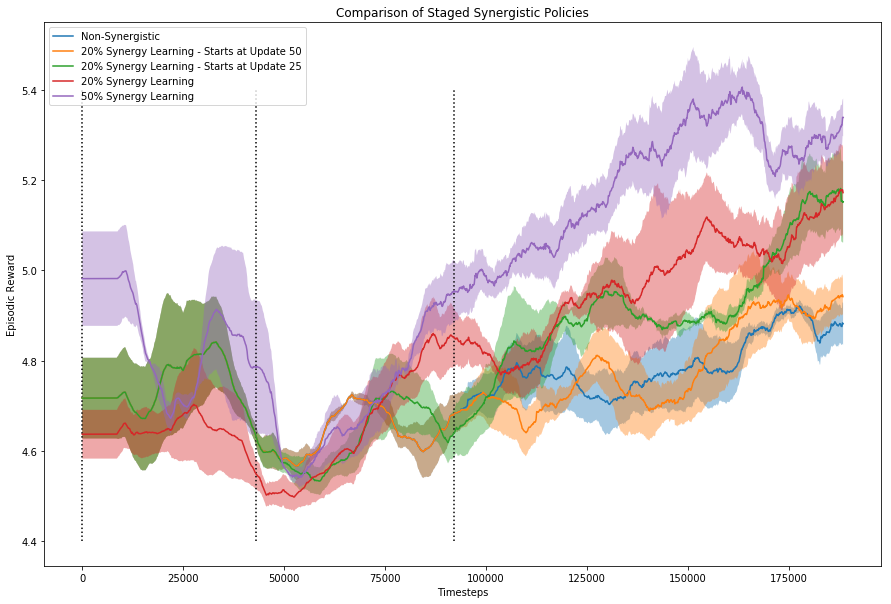

In [3]:
plt.figure(figsize=(15,10))

# classic = glob.glob('returns_staging/standard*.npy')
# means, stds = get_stats(classic)
# plt.plot(means, label='Standard Policy')
# plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

standards = glob.glob('returns_staging/bernoulli-1.0*.npy')
means, stds = get_stats(standards)
plt.plot(means, label='Non-Synergistic')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

s50s = glob.glob('returns_staging/bernoulli-0.8_s50*.npy')
means, stds = get_stats(s50s)
plt.plot(means, label='20% Synergy Learning - Starts at Update 50')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

s25s = glob.glob('returns_staging/bernoulli-0.8_s25*.npy')
means, stds = get_stats(s25s)
plt.plot(means, label='20% Synergy Learning - Starts at Update 25')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

s0s = glob.glob('returns_staging/bernoulli-0.8_s0*.npy')
means, stds = get_stats(s0s)
plt.plot(means, label='20% Synergy Learning')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

s0s2 = glob.glob('returns_staging/bernoulli-0.5_s0*.npy')
means, stds = get_stats(s0s2)
plt.plot(means, label='50% Synergy Learning')
plt.fill_between(range(len(means)), means-stds/2, means+stds/2, alpha=0.4)

plt.vlines(0*2048, 4.4, 5.4, linestyles='dotted')
plt.vlines(21*2048, 4.4, 5.4, linestyles='dotted')
plt.vlines(45*2048, 4.4, 5.4, linestyles='dotted')


plt.legend()

plt.xlabel("Timesteps")
plt.ylabel("Episodic Reward")
plt.title("Comparison of Staged Synergistic Policies")


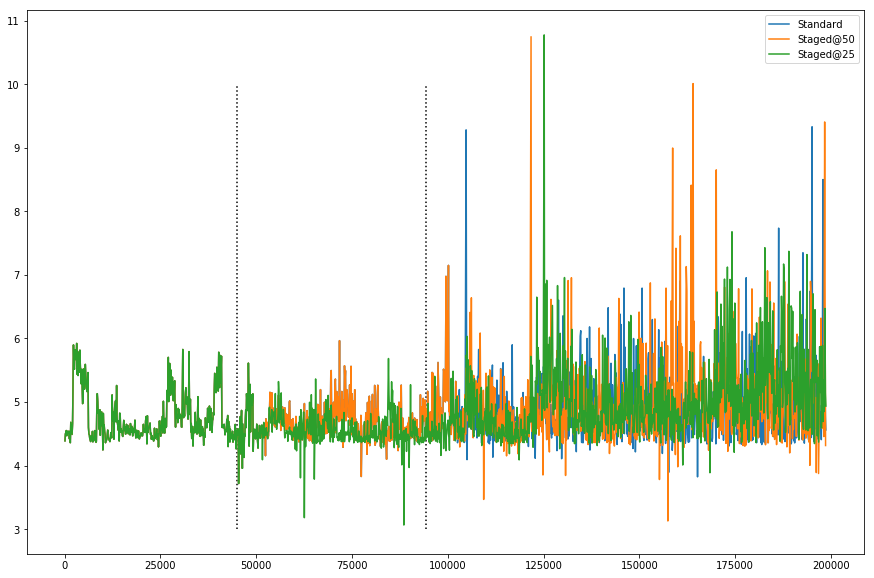

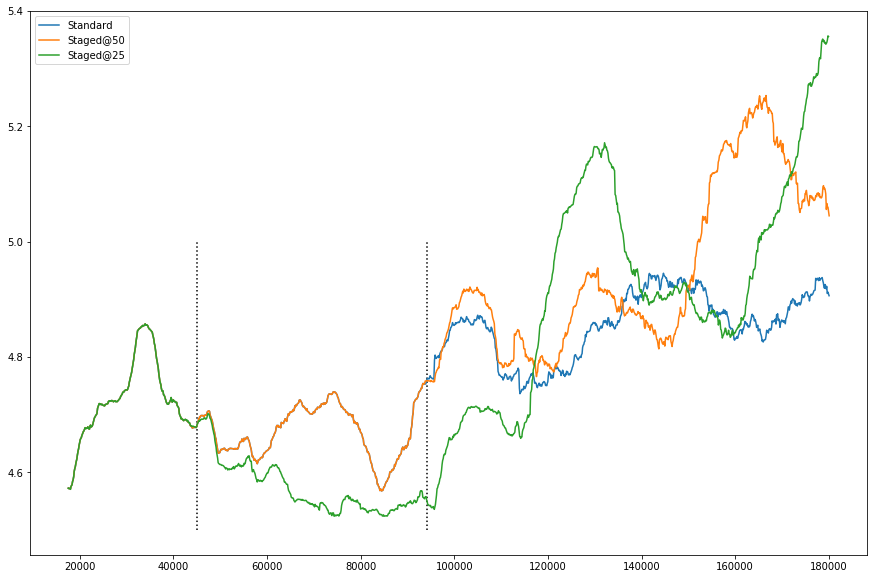

In [79]:
standard = np.load('returns_staging/bernoulli-1.0.npy')
standard_x = np.load('returns_staging/x_data-bernoulli-1.0.npy')
staged_50 = np.load('returns_staging/bernoulli-0.8_s50.npy')
staged_50_x = np.load('returns_staging/x_data-bernoulli-0.8_s50.npy')
staged_25 = np.load('returns_staging/bernoulli-0.8_s25.npy')
staged_25_x = np.load('returns_staging/x_data-bernoulli-0.8_s25.npy')

plt.figure(figsize=(15,10))
plt.plot(standard_x, standard, label='Standard')
plt.plot(staged_50_x, staged_50, label='Staged@50')
plt.plot(staged_25_x, staged_25, label='Staged@25')
plt.vlines(2048*22, 3, 10.0, linestyles='dotted')
plt.vlines(2048*46, 3, 10.0, linestyles='dotted')

plt.legend()

plt.figure(figsize=(15,10))
window_size = 150

standard_smooth = np.convolve(np.ones(window_size)/window_size, standard, mode='same')
staged_50_smooth = np.convolve(np.ones(window_size)/window_size, staged_50, mode='same')
staged_25_smooth = np.convolve(np.ones(window_size)/window_size, staged_25, mode='same')

plt.plot(standard_x[window_size:-window_size], standard_smooth[window_size:-window_size], label='Standard')
plt.plot(staged_50_x[window_size:-window_size], staged_50_smooth[window_size:-window_size], label='Staged@50')
plt.plot(staged_25_x[window_size:-window_size], staged_25_smooth[window_size:-window_size], label='Staged@25')

plt.vlines(2048*22, 4.5, 5.0, linestyles='dotted')
plt.vlines(2048*46, 4.5, 5.0, linestyles='dotted')


plt.legend()

In [108]:
target_x = np.arange(200, 200001)
inter_standard = np.interp(target_x, standard_x[74:-75], np.convolve(np.ones(window_size)/window_size, standard, mode='valid'))

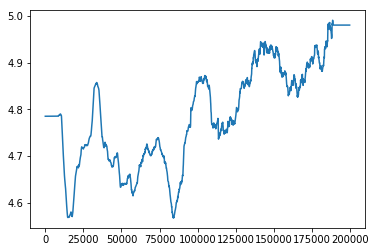

In [109]:
plt.plot(inter_standard)

In [104]:
 np.convolve(np.ones(window_size)/window_size, standard, mode='valid').shape

(1524,)

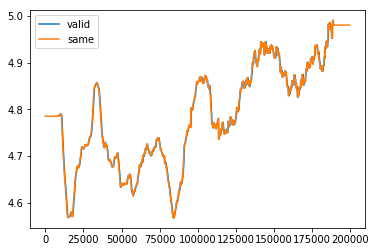

In [111]:
plt.figure()
standard_smooth = np.convolve(np.ones(window_size)/window_size, standard, mode='valid')
plt.plot(standard_x[74:-75],standard_smooth, label='valid')
standard_smooth = inter_standard
plt.plot(standard_smooth[75:-75], label='same')
plt.legend()

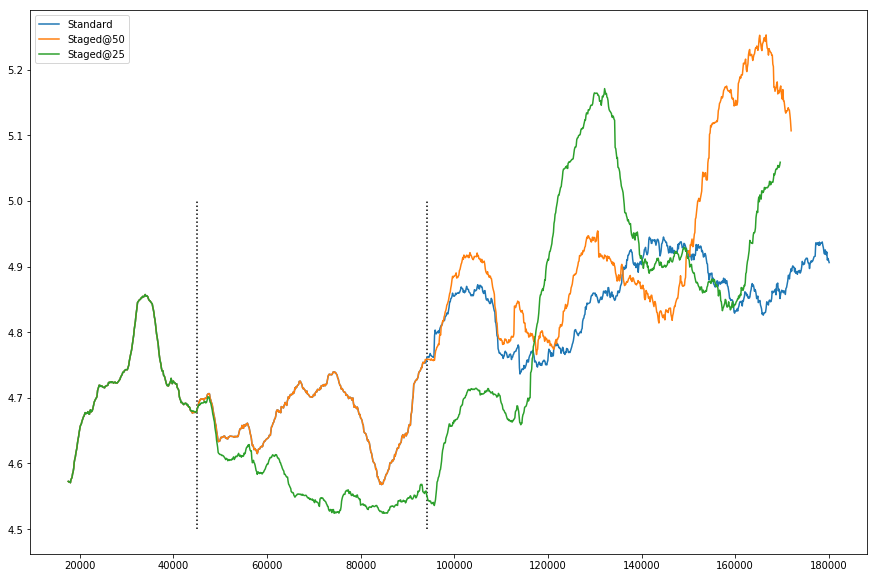

In [74]:
plt.figure(figsize=(15,10))
window_size = 150

standard_smooth = np.convolve(np.ones(window_size)/window_size, standard, mode='same')
staged_50_smooth = np.convolve(np.ones(window_size)/window_size, staged_50, mode='same')
staged_25_smooth = np.convolve(np.ones(window_size)/window_size, staged_25, mode='same')

plt.plot(standard_x[window_size:-window_size], standard_smooth[window_size:-window_size], label='Standard')
plt.plot(staged_50_x[window_size:-window_size], staged_50_smooth[window_size:-window_size], label='Staged@50')
plt.plot(staged_25_x[window_size:-window_size], staged_25_smooth[window_size:-window_size], label='Staged@25')

plt.vlines(2048*22, 4.5, 5.0, linestyles='dotted')
plt.vlines(2048*46, 4.5, 5.0, linestyles='dotted')


plt.legend()

In [2]:
os.listdir('returns_staging/')

['bernoulli-0.8_staged_25.npy',
 'bernoulli-0.8_staged_50.npy',
 'bernoulli-1.0.npy',
 'x_data-bernoulli-0.8_staged_25.npy',
 'x_data-bernoulli-0.8_staged_50.npy',
 'x_data-bernoulli-1.0.npy']